In [1]:
from google.colab import files
uploaded = files.upload()

Saving poster1.jpg to poster1.jpg


In [2]:
import os
os.listdir()

['.config', 'poster1.jpg', 'sample_data']

In [11]:
import tensorflow as tf

img_path = 'poster1.jpg'
img = tf.keras.utils.load_img(img_path, target_size=(224, 224))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Top 3 predictions:
1: book_jacket (0.57)
2: comic_book (0.31)
3: volcano (0.01)


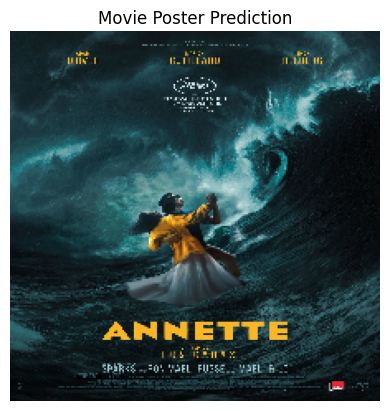

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained MobileNetV2 model
model = tf.keras.applications.MobileNetV2(weights='imagenet')

# Load the image
img_path = 'poster1.jpg'  # Path to the movie poster image file
img = image.load_img(img_path, target_size=(224, 224))  # Resize the image to 224x224

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

# Make a prediction
predictions = model.predict(img_array)

# Decode the predictions to class labels
decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=3)[0]

# Print the top 3 predictions
print("Top 3 predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}: {label} ({score:.2f})")

# Optionally display the image
plt.imshow(img)
plt.title('Movie Poster Prediction')
plt.axis('off')
plt.show()